In [61]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

We start by working with the elliptic curve $$y^2=x^3-x+1,$$ and develop a parameterization of this curve as follows.

In [62]:
def ECP_1(t): # ECP = "elliptic curve parameterization"
    g = lambda t: 1/t - 3.325
    
    if(0.5 < t < 1):
        return (g(1-t), np.sqrt(g(1-t)**3-g(1-t)+1)) # positive half of curve
    elif(0 < t < 0.5):
        return (g(t), -np.sqrt(g(t)**3-g(t)+1)) # negative half of curve
    else:
        return (-1.325, 0)
    
def ECP_1_inverse(P): # P = (P_x, P_y).
    if (P[1] > 0): # reverse according to positive side
        return 1 - 1/(P[0]+3.325) # Use x-coordinate to reverse ECP_1.
    if(P[1] < 0): # reverse if on negative side
        return 1/(P[0]+3.325)
    else:
        return 0.5

In [63]:
ECP_1(0.49)

(-1.2841836734693879, -0.4079225372669378)

In [64]:
ECP_1_inverse((0,1))

0.6992481203007519

In order to add two points on an arbitrary elliptic curve, we can do the following. Let $P$ and $Q$ be points on an elliptic curve $\mathcal{E}$, and let $$P+Q=R.$$ Then we have that $R=(R_x,R_y)$ is defined as follows, with $\lambda=\frac{Q_y-P_y}{Q_x-P_x}$:
$$R_x = \lambda^2-P_x-Q_x$$
$$R_y = \lambda(P_x-R_x)-P_y,$$
when neither $P$ nor $Q$ are the point at infinity, $\mathcal{O}$.

In [65]:
def ECP_1_add(P, Q):
    L = (Q[1] - P[1])/(Q[0] - P[0]) # lambda
    R_x = L**2 - P[0] - Q[0]
    R_y = L * (P[0] - R_x) - P[1]
    R_y = ECP_1(ECP_1_inverse((R_x, R_y)))[1]
    return (R_x, R_y)

In [66]:
ECP_1_add((-1.325, 0), (0, 1)) # this is correct.

(1.8945977216091134, -2.4302390413376056)

Using these functions, we can now define partial sums of a sequence of points using elliptic curve addition.

In [67]:
def partial_sums(ECP, PDF, add, n=100): # PDF must be defined on [0,1). This returns partial sums for a **single series** of points.
        P = [ECP_1(k) for k in PDF(size=n)] # The set of points P_1, P_2, P_3, ... P_n
        P_sum = [P[0]]
        for i in range(1,len(P)):
            P_sum.append(add(P_sum[i-1], P[i]))
        return np.array(P_sum)

## Testing partial sums of $y^2=x^3-x+1$ with a uniform PDF

In [68]:
def PDF_truncnorm(size):
    return scipy.stats.truncnorm.rvs(-1,1,scale=0.5, size=size)+0.5

def PDF_uniform(size):
    return np.random.uniform(size=size)

def PDF_uniform_limit(size):
    return np.random.uniform(low=0.49,high=0.51,size=size)

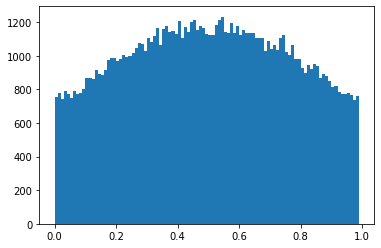

In [69]:
plot_dist = PDF_truncnorm(100000)

plt.hist(plot_dist, bins=np.arange(0,1,0.01))
plt.show()

In [70]:
ECP_1_sums = np.array([partial_sums(ECP_1, PDF_truncnorm, ECP_1_add, n=1000) for _ in range(10000)]) # Calculate partial sums a lot of times.

<ipython-input-62-f384ce9f172c>:5: RuntimeWarning: invalid value encountered in sqrt
  return (g(1-t), np.sqrt(g(1-t)**3-g(1-t)+1)) # positive half of curve
<ipython-input-62-f384ce9f172c>:7: RuntimeWarning: invalid value encountered in sqrt
  return (g(t), -np.sqrt(g(t)**3-g(t)+1)) # negative half of curve


<ipython-input-62-f384ce9f172c>:5: RuntimeWarning: invalid value encountered in sqrt
  return (g(1-t), np.sqrt(g(1-t)**3-g(1-t)+1)) # positive half of curve


(-15.0, 15.0)

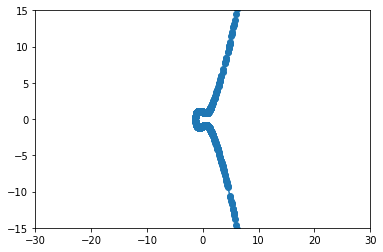

In [71]:
plt.scatter(ECP_1_sums[0].T[0], ECP_1_sums[0].T[1])
plt.plot([ECP_1(t)[0] for t in np.arange(0.1,0.9,0.001)], [ECP_1(t)[1] for t in np.arange(0.1,0.9,0.001)])
plt.xlim(-30,30)
plt.ylim(-15,15)

We now convert `ECP_1_sums` back into the original parameterization variable $t$.

In [72]:
ECP_1_sums_t = np.array([[ECP_1_inverse(P) for P in ECP_sum] for ECP_sum in ECP_1_sums])

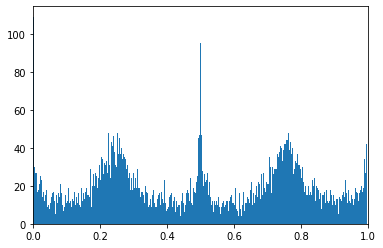

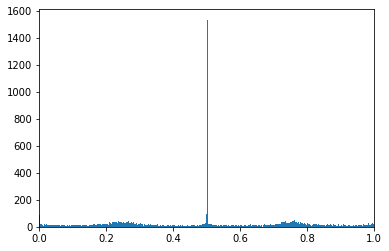

In [73]:
plt.hist(ECP_1_sums_t.T[1], bins=np.arange(0,1,0.002))
plt.xlim(0,1)
plt.show()

plt.hist(ECP_1_sums_t.T[999], bins=np.arange(0,1,0.002))
plt.xlim(0,1)
plt.show()

<ipython-input-62-f384ce9f172c>:5: RuntimeWarning: invalid value encountered in sqrt
  return (g(1-t), np.sqrt(g(1-t)**3-g(1-t)+1)) # positive half of curve


(-15.0, 15.0)

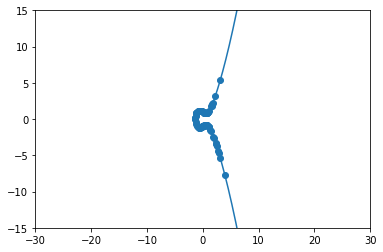

In [74]:
plt.scatter(np.array([ECP_1(t) for t in ECP_1_sums_t.T[99]]).T[0][:100], np.array([ECP_1(t) for t in ECP_1_sums_t.T[99]]).T[1][:100])
plt.plot([ECP_1(t)[0] for t in np.arange(0.1,0.9,0.001)], [ECP_1(t)[1] for t in np.arange(0.1,0.9,0.001)])
plt.xlim(-30,30)
plt.ylim(-15,15)

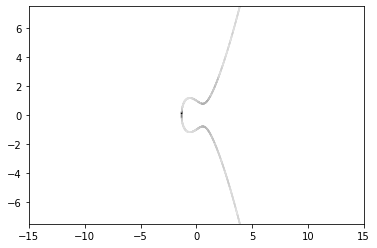

In [75]:
plt_hist = np.histogram(ECP_1_sums_t.T[99], bins=np.arange(0,1,0.002))[0]
color = [1 - (plt_hist[k]/np.max(plt_hist))**0.7 for k in range(len(plt_hist))]
data_x, data_y = [ECP_1(t)[0] for t in np.arange(0.001,0.999,0.002)], [ECP_1(t)[1] for t in np.arange(0.001,0.999,0.002)]

for i in range(np.size(np.arange(0.001,0.999,0.002))):
    plt.plot(data_x[i:i+5], data_y[i:i+5],
            color=(color[i],color[i],color[i]))
plt.xlim(-15,15)
plt.ylim(-7.5,7.5)
plt.show()